# Fashin MNIST
#### MNIST 패션 이미지를 CNN을 이용하여 분류하세요. CNN을 이용한 분류 결과를 MLP와 비교해보세요.


In [32]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

#### Multi-Layer Perceptron (MLP)

In [33]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [34]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5714 - acc: 0.7945 - val_loss: 0.5057 - val_acc: 0.8165
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3996 - acc: 0.8565 - val_loss: 0.4309 - val_acc: 0.8352
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3602 - acc: 0.8705 - val_loss: 0.3870 - val_acc: 0.8552
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3320 - acc: 0.8806 - val_loss: 0.3326 - val_acc: 0.8745
Epoch 5/10
782/782 [==============================] - 18s 22ms/step - loss: 0.3155 - acc: 0.8847 - val_loss: 0.3491 - val_acc: 0.8740
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3007 - acc: 0.8911 - val_loss: 0.3487 - val_acc: 0.8755
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2882 - acc: 0.8962 - val_loss: 0.3283 - val_acc: 0.8796
Epoch 8/10
782/782 [==============================] - 18s 23ms

In [36]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3626 - acc: 0.8749


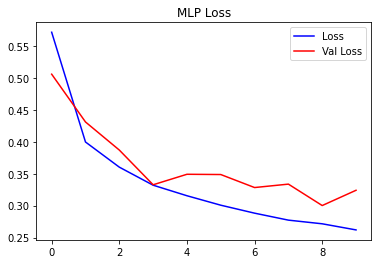

In [118]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'b-',label='Loss')
plt.plot(x,val_loss,'r-',label='Val Loss')
plt.title("MLP Loss")
plt.legend()

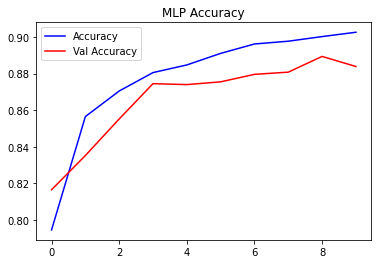

In [119]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'b-',label='Accuracy')
plt.plot(x,val_acc,'r-',label='Val Accuracy')
plt.title("MLP Accuracy")
plt.legend()

# CNN

In [73]:
(X_CNN, y_CNN), (X_CNNtest, y_CNNtest) = fashion_mnist.load_data()

# preprocessing
X_CNN = X_CNN.reshape((60000, 28, 28, 1))
X_CNN = X_CNN/255

X_CNNtest = X_CNNtest.reshape((10000, 28, 28, 1))
X_CNNtest = X_CNNtest/255

y_CNN=to_categorical(y_CNN)
y_CNNtest=to_categorical(y_CNNtest)

In [74]:
net = models.Sequential()
net.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(64,(3,3), activation='relu')) 
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(64,(3,3), activation='relu'))
net.add(layers.Flatten())
net.add(layers.Dense(64, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [75]:
net.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)              

In [76]:
X_CNNval = X_CNN[:10000]
partial_X_CNN = X_CNN[10000:]

y_CNNval = y_CNN[:10000]
partial_y_CNN = y_CNN[10000:]

In [111]:
CNNval = net.fit(X_CNN, y_CNN, epochs=10, batch_size=64, validation_data=(X_CNNval, y_CNNval))

Epoch 1/10
938/938 [==============================] - 51s 54ms/step - loss: 0.1379 - acc: 0.9489 - val_loss: 0.1285 - val_acc: 0.9525
Epoch 2/10
938/938 [==============================] - 55s 58ms/step - loss: 0.1260 - acc: 0.9542 - val_loss: 0.1170 - val_acc: 0.9550
Epoch 3/10
938/938 [==============================] - 51s 55ms/step - loss: 0.1179 - acc: 0.9552 - val_loss: 0.0927 - val_acc: 0.9675
Epoch 4/10
938/938 [==============================] - 52s 55ms/step - loss: 0.1057 - acc: 0.9603 - val_loss: 0.0876 - val_acc: 0.9663
Epoch 5/10
938/938 [==============================] - 53s 56ms/step - loss: 0.0972 - acc: 0.9638 - val_loss: 0.0775 - val_acc: 0.9691
Epoch 6/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0910 - acc: 0.9663 - val_loss: 0.0721 - val_acc: 0.9719
Epoch 7/10
938/938 [==============================] - 51s 55ms/step - loss: 0.0840 - acc: 0.9686 - val_loss: 0.0697 - val_acc: 0.9725
Epoch 8/10
938/938 [==============================] - 52s 55ms

In [112]:
test_loss, test_acc = net.evaluate(X_CNNtest,y_CNNtest)

313/313 [==============================] - 3s 10ms/step - loss: 0.4023 - acc: 0.9047


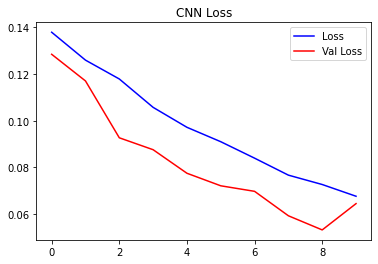

In [120]:
CNNval_dict = CNNval.history
CNNloss = CNNval_dict['loss']
CNNval_loss = CNNval_dict['val_loss']

x = np.arange(0,len(CNNloss))
plt.plot(x,CNNloss,'b-',label='Loss')
plt.plot(x,CNNval_loss,'r-',label='Val Loss')
plt.title("CNN Loss")
plt.legend()

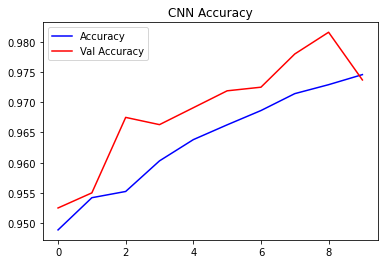

In [121]:
CNNacc = CNNval_dict['acc']
CNNval_acc = CNNval_dict['val_acc']
plt.plot(x,CNNacc,'b-',label='Accuracy')
plt.plot(x,CNNval_acc,'r-',label='Val Accuracy')
plt.title("CNN Accuracy")
plt.legend()

# 보고서

MLP Loss, Accuracy와 CNN Loss, Accuracy를 보면 확인할 수 있는 점으로는 같은 표본에 대해 MLP에 비해 CNN의 Accuracy가 높고 Loss가 낮다는 점을 확인할 수 있다. 또 다른 점으로는 CNN은 선형적으로 증가하는데 비해 MLP에서는 초기 Accuracy의 증가하는 모습이 로그함수 형태임을 확인할 수 있었다.